In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(31321)

import nltk
import re

# Calculate the correlation between names and fake news

In [2]:
# read the dataset
import pandas as pd
df = pd.read_csv("D:/Study/2019-20/Bristol/Homeworks/DST/Assessment3_Kexi_Huang/data/news.csv")
df.shape

(6335, 4)

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Now lemmatize the title and text

In [3]:
news = df[["label", "text"]]

In [4]:
from nltk.tokenize import word_tokenize

### Now use APIs to extract names from the corpus

In [37]:
# Load stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cauch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
onews = df[["label", "text"]]
import string
# Remove puntuations
punc = string.punctuation + "“”‘’\n"
transtab = str.maketrans(punc, " "*13 + "." + " "*(len(punc)-14))
onews["text"] = onews["text"].str.translate(transtab)

In [47]:
import re
# Construct regression format
def findnames(news):
    pattern = r'\. *[A-Z]'
    nnews = re.sub(pattern, "", news)
    p = re.compile(r'[A-Z][a-z]*')
    names = p.findall(nnews)
    names = [name for name in names if (len(name) >= 3 and name.lower() not in stop)]
    return names

In [103]:
names = {}
# find all names in news
for i in range(len(news)):
    name = findnames(news.iloc[i, 1])
    # since we are only interested in fake news, we count it when it appears in fake news
    for val in name:
        if val in names and news.iloc[i, 0] != "FAKE":
            names[val][0] += 1
        elif val not in names:
            names[val] = [int(news.iloc[i, 0] != "FAKE"), int(news.iloc[i, 0] == "FAKE")]
        else:
            names[val][1] += 1 

In [110]:
ratio = {}
for val in names:
    if (names[val][0] + names[val][1]) < 1000:
        continue
    ratio[val] = float(names[val][0] / (names[val][0] + names[val][1]))
df_names = pd.DataFrame(ratio, index = ["ratio"])
df_names = df_names.T

In [111]:
fil_sort = df_names.sort_values(by = ["ratio"], ascending = False)
fil_sort.head()

,ratio
Cruz,0.986063
Rubio,0.984051
Iowa,0.951363
Sanders,0.908301
Senate,0.889683


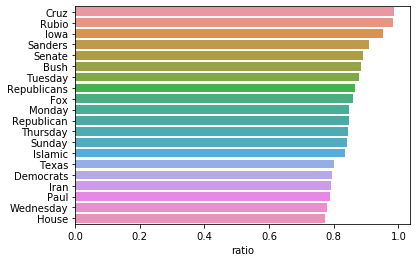

In [112]:
import seaborn as sns
data = fil_sort.head(20)
sns.barplot(y = data.index, x = data["ratio"])